# Fashion MNIST dataset

In [1]:
# Importing libraries
import tensorflow as tf
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

## Understanding the dataset and Pre-processing

In [2]:
#Loading data
data=fashion_mnist.load_data()

In [3]:
#Splitting the data into train and test
(X_train,y_train),(X_test,y_test)=data

### Displaying the number of classes

In [4]:
len(np.unique(y_train))

10

### Displaying the dimensions of each image

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)
Shape of y_train:  (60000,)
Shape of y_test:  (10000,)


### Displaying one image from each class

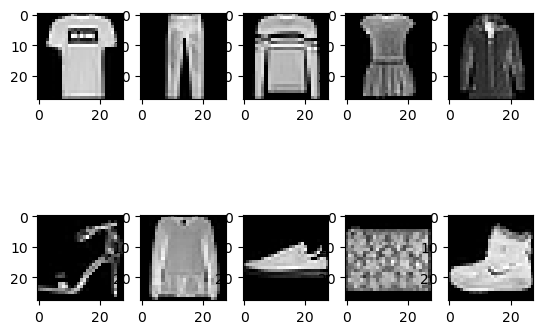

In [6]:
for i in range(0,10):
    plt.subplot(2,5,i+1)
    index=y_train.tolist().index(i)
    plt.imshow(X_train[index],cmap="gray")

### Normalization

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

## Performing experiments on Fully Connected Neural Networks (FCNN):

### Designing a FCNN for the dataset

In [8]:
# Creating a model
model=Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28], name="input_layer"))
model.add(Dense(300, activation='relu', name='hidden1'))
model.add(Dense(100, activation='relu', name="hidden2"))
model.add(Dense(10, activation='softmax', name="output_layer"))

: 

In [ ]:
# Summary of the model
model.summary()

In [ ]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam" ,metrics=["accuracy"])

### Training the network

In [ ]:
# Fitting the model
epochs=5
batch_size=32
history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

### Performance curves

In [ ]:
# Loss vs Epochs curve
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Accuracy vs Epochs curve
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performing experiments on a Convolution Neural Networks (CNNs):

### Designing CNN-1 which contains:
### Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride=1 and padding =0.
### One pooling layer which uses MAXPOOLING with stride=2.
### One hidden layer having number of neurons =100

In [ ]:
# Creating the second CNN model
cnn1=Sequential()
cnn1.add(keras.Input(shape=(28,28,1)))
cnn1.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1), activation='relu', padding='valid'))
cnn1.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1), activation='relu', padding='valid'))
cnn1.add(keras.layers.MaxPooling2D(strides=(2,2)))
cnn1.add(keras.layers.Flatten())
cnn1.add(keras.layers.Dense(100, activation='relu'))
cnn1.add(Dense(10,activation='softmax'))

In [ ]:
# Summary of the model
cnn1.summary()

In [ ]:
# Compiling the model
cnn1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

### Training the networks

In [ ]:
# Fitting the model
epochs=5
batch_size=32
history1=cnn1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

### Performance curves

In [ ]:
# Plotting the Loss vs Epochs curve
loss_train = history1.history['loss']
loss_val = history1.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Comparing the Accuracy vs Epochs curve
acc_train = history1.history['accuracy']
acc_val = history1.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
training_accuracy_fcnn = history.history['accuracy']
validation_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_cnn1 = history1.history['accuracy']
validation_accuracy_cnn1 = history1.history['val_accuracy']
plt.plot(training_accuracy_fcnn, label='Training Accuracy1')
plt.plot(validation_accuracy_fcnn, label='Validation Accuracy1')
plt.plot(training_accuracy_cnn1, label='Training Accuracy2')
plt.plot(validation_accuracy_cnn1, label='Validation Accuracy2')
plt.legend()